In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
artist = pd.read_csv('Artist.csv')
album = pd.read_csv('Album.csv')
customer = pd.read_csv('Customer.csv')
employee = pd.read_csv('Employee.csv')
genre = pd.read_csv('Genre.csv')
invoice = pd.read_csv('Invoice.csv')
invoice_line = pd.read_csv('InvoiceLine.csv')
media_type = pd.read_csv('MediaType.csv')
playlist = pd.read_csv('Playlist.csv')
playlist_track = pd.read_csv('PlaylistTrack.csv')
track = pd.read_csv('Track.csv')

1. Which city has the best customers?
We would like to throw a promotional Music Festival in the city we made the most money. 
Write a query that returns the 1 city that has the highest sum of invoice totals. 
Return both the city name and the sum of all invoice totals.

In [16]:
customer_invoice = pd.merge(left=customer,right=invoice,on='CustomerId')
cities_total = customer_invoice.pivot_table('Total','City',aggfunc=np.sum)
cities = cities_total.sort_values('Total',ascending=False)
cities

,Total
City,
Prague,90.24
Paris,77.24
Mountain View,77.24
São Paulo,75.24
London,75.24
Berlin,75.24
Fort Worth,47.62
Santiago,46.62
Dublin,45.62


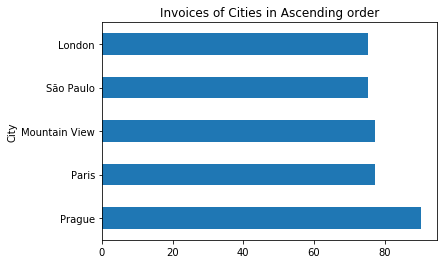

In [25]:
cities.head(5).plot(kind='barh',title='Invoices of Cities in Ascending order',legend=False)

From the figure above, the cities with the highest invoice is Prague

2. Which countries have the most Invoices?
Use the Invoice table to determine the countries that have the most invoices. 
Provide a table of BillingCountry and Invoices ordered by the number of invoices for each country. 
The country with the most invoices should appear first.

In [20]:
invoices = pd.merge(left=invoice, right=invoice_line, on='InvoiceId')
countries_invoice = invoices.pivot_table('Quantity','BillingCountry',aggfunc='count').sort_values('Quantity',ascending=False)
countries_invoice

,Quantity
BillingCountry,
USA,494
Canada,304
Brazil,190
France,190
Germany,152
United Kingdom,114
Czech Republic,76
Portugal,76
India,74


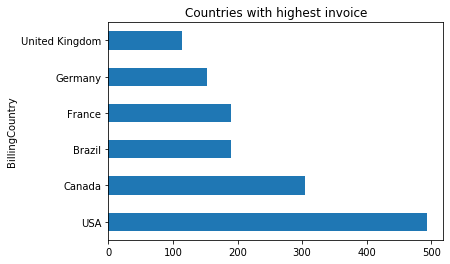

In [29]:
countries_invoice[:6].plot(kind='barh',title='Countries with highest invoice',legend=False)

From the figure above, USA is the country with the highest invoice

3. Who is the best customer?
The customer who has spent the most money will be declared the best customer. 
Build a query that returns the person who has spent the most money

In [51]:
customer_invoice = pd.merge(left=customer,right=invoice,on='CustomerId')
customer_invoices = pd.merge(left=customer_invoice,right=invoice_line,on='InvoiceId')
#cutomers = customer_invoices.groupby(['CustomerId','FirstName','LastName'])
customers = customer_invoices.pivot_table('UnitPrice',['CustomerId','FirstName','LastName'],aggfunc=np.sum)
customers

,,,UnitPrice
CustomerId,FirstName,LastName,
1,Luís,Gonçalves,39.62
2,Leonie,Köhler,37.62
3,François,Tremblay,39.62
4,Bjørn,Hansen,39.62
5,František,Wichterlová,40.62
6,Helena,Holý,49.62
7,Astrid,Gruber,42.62
8,Daan,Peeters,37.62
9,Kara,Nielsen,37.62


In [54]:
best_customers = customers.sort_values('UnitPrice',ascending=False).head(5)
best_customers

,,,UnitPrice
CustomerId,FirstName,LastName,
6,Helena,Holý,49.62
26,Richard,Cunningham,47.62
57,Luis,Rojas,46.62
45,Ladislav,Kovács,45.62
46,Hugh,O'Reilly,45.62


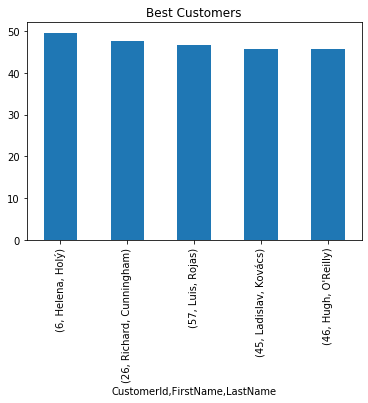

In [64]:
best_customers.plot(kind='bar',title='Best Customers', legend=False)

From the image above, Helena is the best customer

4. Use your query to return the email, first name, last name, and Genre of all Rock Music listeners. 
Return your list ordered alphabetically by email address starting with A.

In [70]:
tracks = pd.merge(left=track,right=genre,on='GenreId',suffixes=('track_name','genre_name'))
customer_track = pd.merge(left=customer_invoices,right=tracks,on='TrackId',suffixes=('customer_unitprice','track_unitprice'))
customer_track.columns

Index(['CustomerId', 'FirstName', 'LastName', 'Company', 'Address', 'City',
       'State', 'Country', 'PostalCode', 'Phone', 'Fax', 'Email',
       'SupportRepId', 'InvoiceId', 'InvoiceDate', 'BillingAddress',
       'BillingCity', 'BillingState', 'BillingCountry', 'BillingPostalCode',
       'Total', 'InvoiceLineId', 'TrackId', 'UnitPricecustomer_unitprice',
       'Quantity', 'Nametrack_name', 'AlbumId', 'MediaTypeId', 'GenreId',
       'Composer', 'Milliseconds', 'Bytes', 'UnitPricetrack_unitprice',
       'Namegenre_name'],
      dtype='object')

In [78]:
rock_details = customer_track.loc[customer_track['Namegenre_name']=='Rock',['Email','FirstName','LastName','Namegenre_name']].sort_values('Email')

In [80]:
rock_details.head(10)

,Email,FirstName,LastName,Namegenre_name
1337,aaronmitchell@yahoo.ca,Aaron,Mitchell,Rock
1343,aaronmitchell@yahoo.ca,Aaron,Mitchell,Rock
174,aaronmitchell@yahoo.ca,Aaron,Mitchell,Rock
1344,aaronmitchell@yahoo.ca,Aaron,Mitchell,Rock
1345,aaronmitchell@yahoo.ca,Aaron,Mitchell,Rock
1347,aaronmitchell@yahoo.ca,Aaron,Mitchell,Rock
1368,aaronmitchell@yahoo.ca,Aaron,Mitchell,Rock
1373,aaronmitchell@yahoo.ca,Aaron,Mitchell,Rock
1342,aaronmitchell@yahoo.ca,Aaron,Mitchell,Rock
467,alero@uol.com.br,Alexandre,Rocha,Rock


5. We want to find out the most popular music Genre for each country.
We determine the most popular genre as the genre with the highest amount of purchases. 
Write a query that returns each country along with the top Genre. 
For countries where the maximum number of purchases is shared return all Genres.

In [138]:
new_table = customer_track.pivot_table('InvoiceId',['BillingCountry','Namegenre_name'],aggfunc='count')
new_table

InvoiceId
BillingCountry Namegenre_name               
Argentina      Alternative & Punk          9
               Easy Listening              2
               Jazz                        2
               Latin                       8
               Metal                       7
               Rock                        9
               Soundtrack                  1
Australia      Blues                       1
               Heavy Metal                 3
               Latin                       2
               Metal                       8
               Reggae                      2
               Rock                       22
Austria        Classical                   2
               Drama                       1
               Jazz                        2
               Latin                       2
               Metal                       7
               Pop                         1
               R&B/Soul                    4
               Rock                       15
               TV Shows                    4
Belgium        Alternative & Punk         14
               Metal                       1
               R&B/Soul                    2
               Rock                       21
Brazil         Alternative & Punk          7
               Blues                       6
               Classical                   6
               Hip Hop/Rap                 2
...                                      ...
USA            Blues                      15
               Bossa Nova                  7
               Classical                   8
               Comedy                      8
               Drama                       6
               Easy Listening              3
               Heavy Metal                 4
               Hip Hop/Rap                 4
               Jazz                       22
               Latin                      91
               Metal                      64
               Pop                         5
               R&B/Soul                   12
               Reggae                      6
               Rock                      157
               Rock And Roll               3
               Sci Fi & Fantasy            5
               Science Fiction             1
               Soundtrack                  4
               TV Shows                   14
United Kingdom Alternative & Punk          9
               Hip Hop/Rap                 3
               Jazz                        4
               Latin                      31
               Metal                      20
               Pop                         2
               R&B/Soul                    2
               Reggae                      5
               Rock                       37
               World                       1

[237 rows x 1 columns]

In [107]:
#new_table.pivot_table('InvoiceId',['BillingCountry','Namegenre_name'],aggfunc=np.max)
#value = new_table[new_table['InvoiceId']==new_table['InvoiceId'].max()]
value = {}
for index, values in new_table.iterrows():
    value[index] = values.max()

In [122]:
new_table.drop(['BillingCountry'],axis=1,inplace=True)

In [124]:
final_table = new_table.reset_index()

In [131]:
final_table.head()

,BillingCountry,Namegenre_name,InvoiceId
0,Argentina,Alternative & Punk,9
1,Argentina,Easy Listening,2
2,Argentina,Jazz,2
3,Argentina,Latin,8
4,Argentina,Metal,7


In [148]:
go = final_table.pivot_table('InvoiceId',['BillingCountry'],aggfunc=np.max)
go.rename(columns={'InvoiceId':'max_invoice'},inplace='True')

In [152]:
go = go.reset_index()

In [155]:
final = pd.merge(left=final_table,right=go,on='BillingCountry')

In [157]:
result = final.loc[final['InvoiceId']==final['max_invoice'],['BillingCountry','Namegenre_name','max_invoice']]

In [158]:
result.head()

,BillingCountry,Namegenre_name,max_invoice
0,Argentina,Alternative & Punk,9
5,Argentina,Rock,9
12,Australia,Rock,22
20,Austria,Rock,15
25,Belgium,Rock,21


In [166]:
#result.plot(kind='barh',figsize=(20,20),x=['BillingCountry'],label='Country and the maximum purchases for each genre')